# **PART 1: Building up a basic predictive model**

### **Data Cleaning and Transformation**

In [1]:
#Loading required libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the dataset
diabetic_data = pd.read_csv("diabetic_data.csv")

In [3]:
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# shape of the data
print("Shape of the data:", diabetic_data.shape)

Shape of the data: (101766, 50)


In [6]:
# Deleting the column 'encounter_id'
diabetic_data.drop(columns=['encounter_id'], inplace=True)

In [7]:
# Identifying missing values and replace '?' with NaN
diabetic_data.replace('?', pd.NA, inplace=True)

In [8]:
# Showing the summary of missing values before and after replacing '?'
print("Missing values before replacing '?' with NaN:")
diabetic_data.isnull().sum()

Missing values before replacing '?' with NaN:


patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [9]:
# The response variable of 'readmitted' to binary
diabetic_data['readmitted'] = diabetic_data['readmitted'].map({'<30': 1, '>30': 0, 'NO': 0})

In [10]:
# Checking the datatype of each column
print("Datatype of each column:")
diabetic_data.dtypes

Datatype of each column:


patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

In [11]:
# Calculating the percentage of missing values for each column
missing_percentage = (diabetic_data.isnull().sum() / len(diabetic_data)) * 100
missing_percentage

patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropami

In [12]:
# Dropping the columns with more than 90% missing values
columns_to_drop = missing_percentage[missing_percentage > 90].index
diabetic_data.drop(columns=columns_to_drop, inplace=True)

In [13]:
# Dropping the columns with no variations
diabetic_data.drop(columns=['examide', 'citoglipton'], inplace=True)

In [14]:
# Dropping rows with null values
diabetic_data.dropna(inplace=True)

In [15]:
# Defining the list of near-zero-variance columns that need to be deleted
columns_to_delete = ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                     'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol',
                     'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
                     'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                     'metformin-pioglitazone']

# Dropping the specified columns from the DataFrame
diabetic_data.drop(columns=columns_to_delete, inplace=True)

# Display the shape of the DataFrame after dropping columns
print("Shape of DataFrame after dropping near-zero-variance columns:", diabetic_data.shape)


Shape of DataFrame after dropping near-zero-variance columns: (26755, 31)


In [16]:
# summary statistics of numerical columns
print("Summary statistics of numerical columns:")
diabetic_data.describe()

Summary statistics of numerical columns:


,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,2.675500e+04,26755.000000,26755.000000,26755.000000,26755.000000,26755.000000,26755.000000,26755.000000,26755.000000,26755.000000,26755.000000,26755.000000,26755.000000
mean,5.732865e+07,2.019137,2.959821,4.972267,4.317922,40.756681,1.475575,16.246720,0.290712,0.311755,0.670641,7.355522,0.106784
std,3.710987e+07,0.946664,4.327149,3.522615,2.949791,19.965546,1.749729,8.609362,0.998707,1.437214,1.367311,1.895473,0.308844
min,7.290000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,2.425177e+07,1.000000,1.000000,1.000000,2.000000,29.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,4.401274e+07,2.000000,1.000000,7.000000,4.000000,42.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,9.230198e+07,3.000000,3.000000,7.000000,6.000000,54.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000
max,1.893659e+08,6.000000,28.000000,22.000000,14.000000,132.000000,6.000000,81.000000,38.000000,76.000000,16.000000,16.000000,1.000000


In [17]:
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26755 entries, 20446 to 101764
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               26755 non-null  int64 
 1   race                      26755 non-null  object
 2   gender                    26755 non-null  object
 3   age                       26755 non-null  object
 4   admission_type_id         26755 non-null  int64 
 5   discharge_disposition_id  26755 non-null  int64 
 6   admission_source_id       26755 non-null  int64 
 7   time_in_hospital          26755 non-null  int64 
 8   payer_code                26755 non-null  object
 9   medical_specialty         26755 non-null  object
 10  num_lab_procedures        26755 non-null  int64 
 11  num_procedures            26755 non-null  int64 
 12  num_medications           26755 non-null  int64 
 13  number_outpatient         26755 non-null  int64 
 14  number_emergency 

In [18]:
# Printing the shape of resulting dataframe
diabetic_data.shape

(26755, 31)

### **Data Visualisation**

In [19]:
#loading required libraries
import seaborn as sns
import matplotlib.pyplot as plt

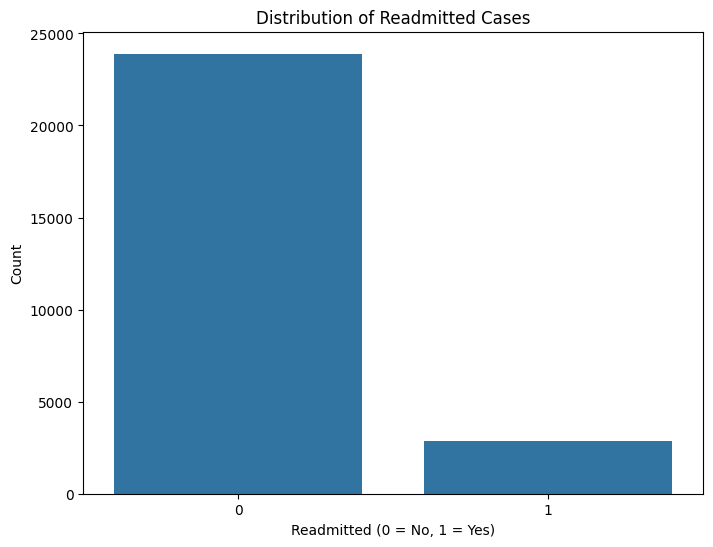

In [20]:
# Plotting the distribution of unique classes of the target variable (readmitted)
plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=diabetic_data)
plt.title('Distribution of Readmitted Cases')
plt.xlabel('Readmitted (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

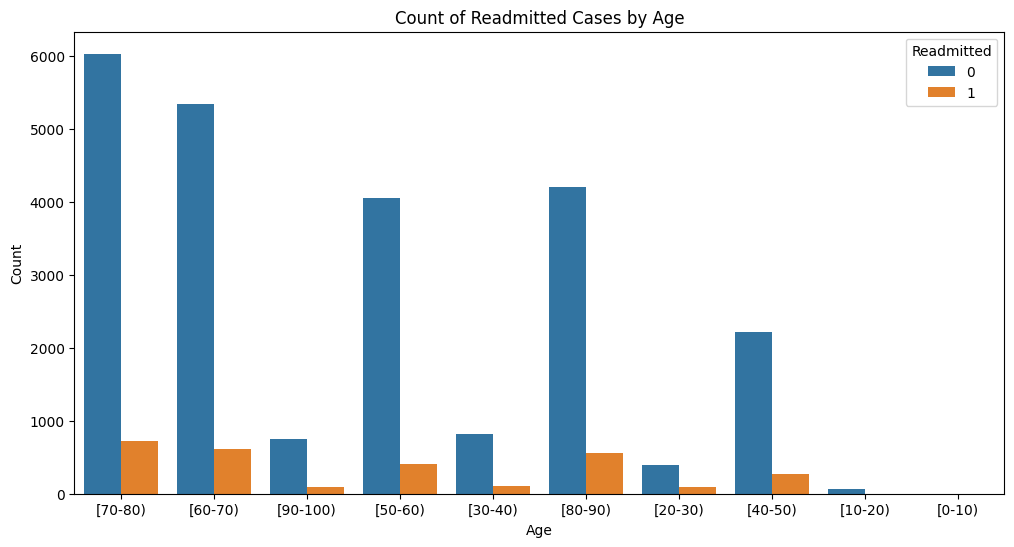

In [21]:
# Plotting the count of number of readmitted cases against age
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='readmitted', data=diabetic_data)
plt.title('Count of Readmitted Cases by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
plt.show()

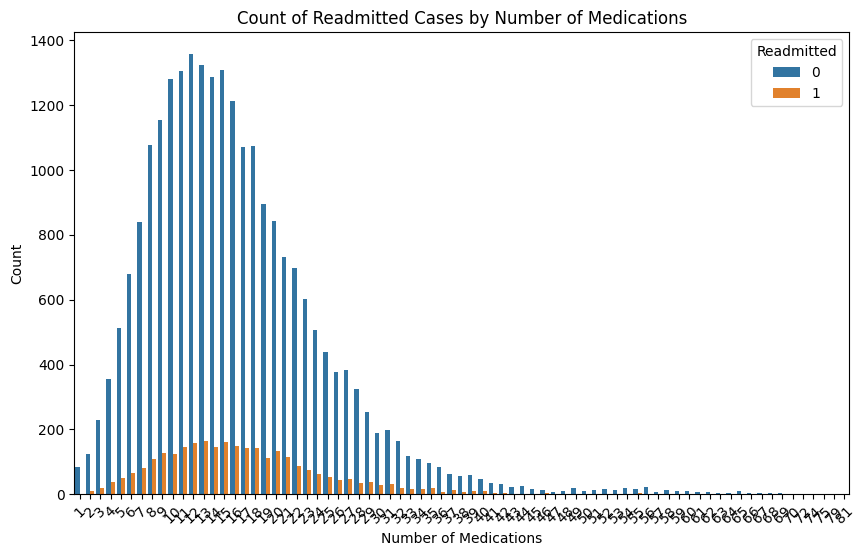

In [22]:
# Plotting a graph that displays the count of target variable against the number of medications
plt.figure(figsize=(10, 6))
sns.countplot(x='num_medications', hue='readmitted', data=diabetic_data)
plt.title('Count of Readmitted Cases by Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
plt.xticks(rotation=45)
plt.show()

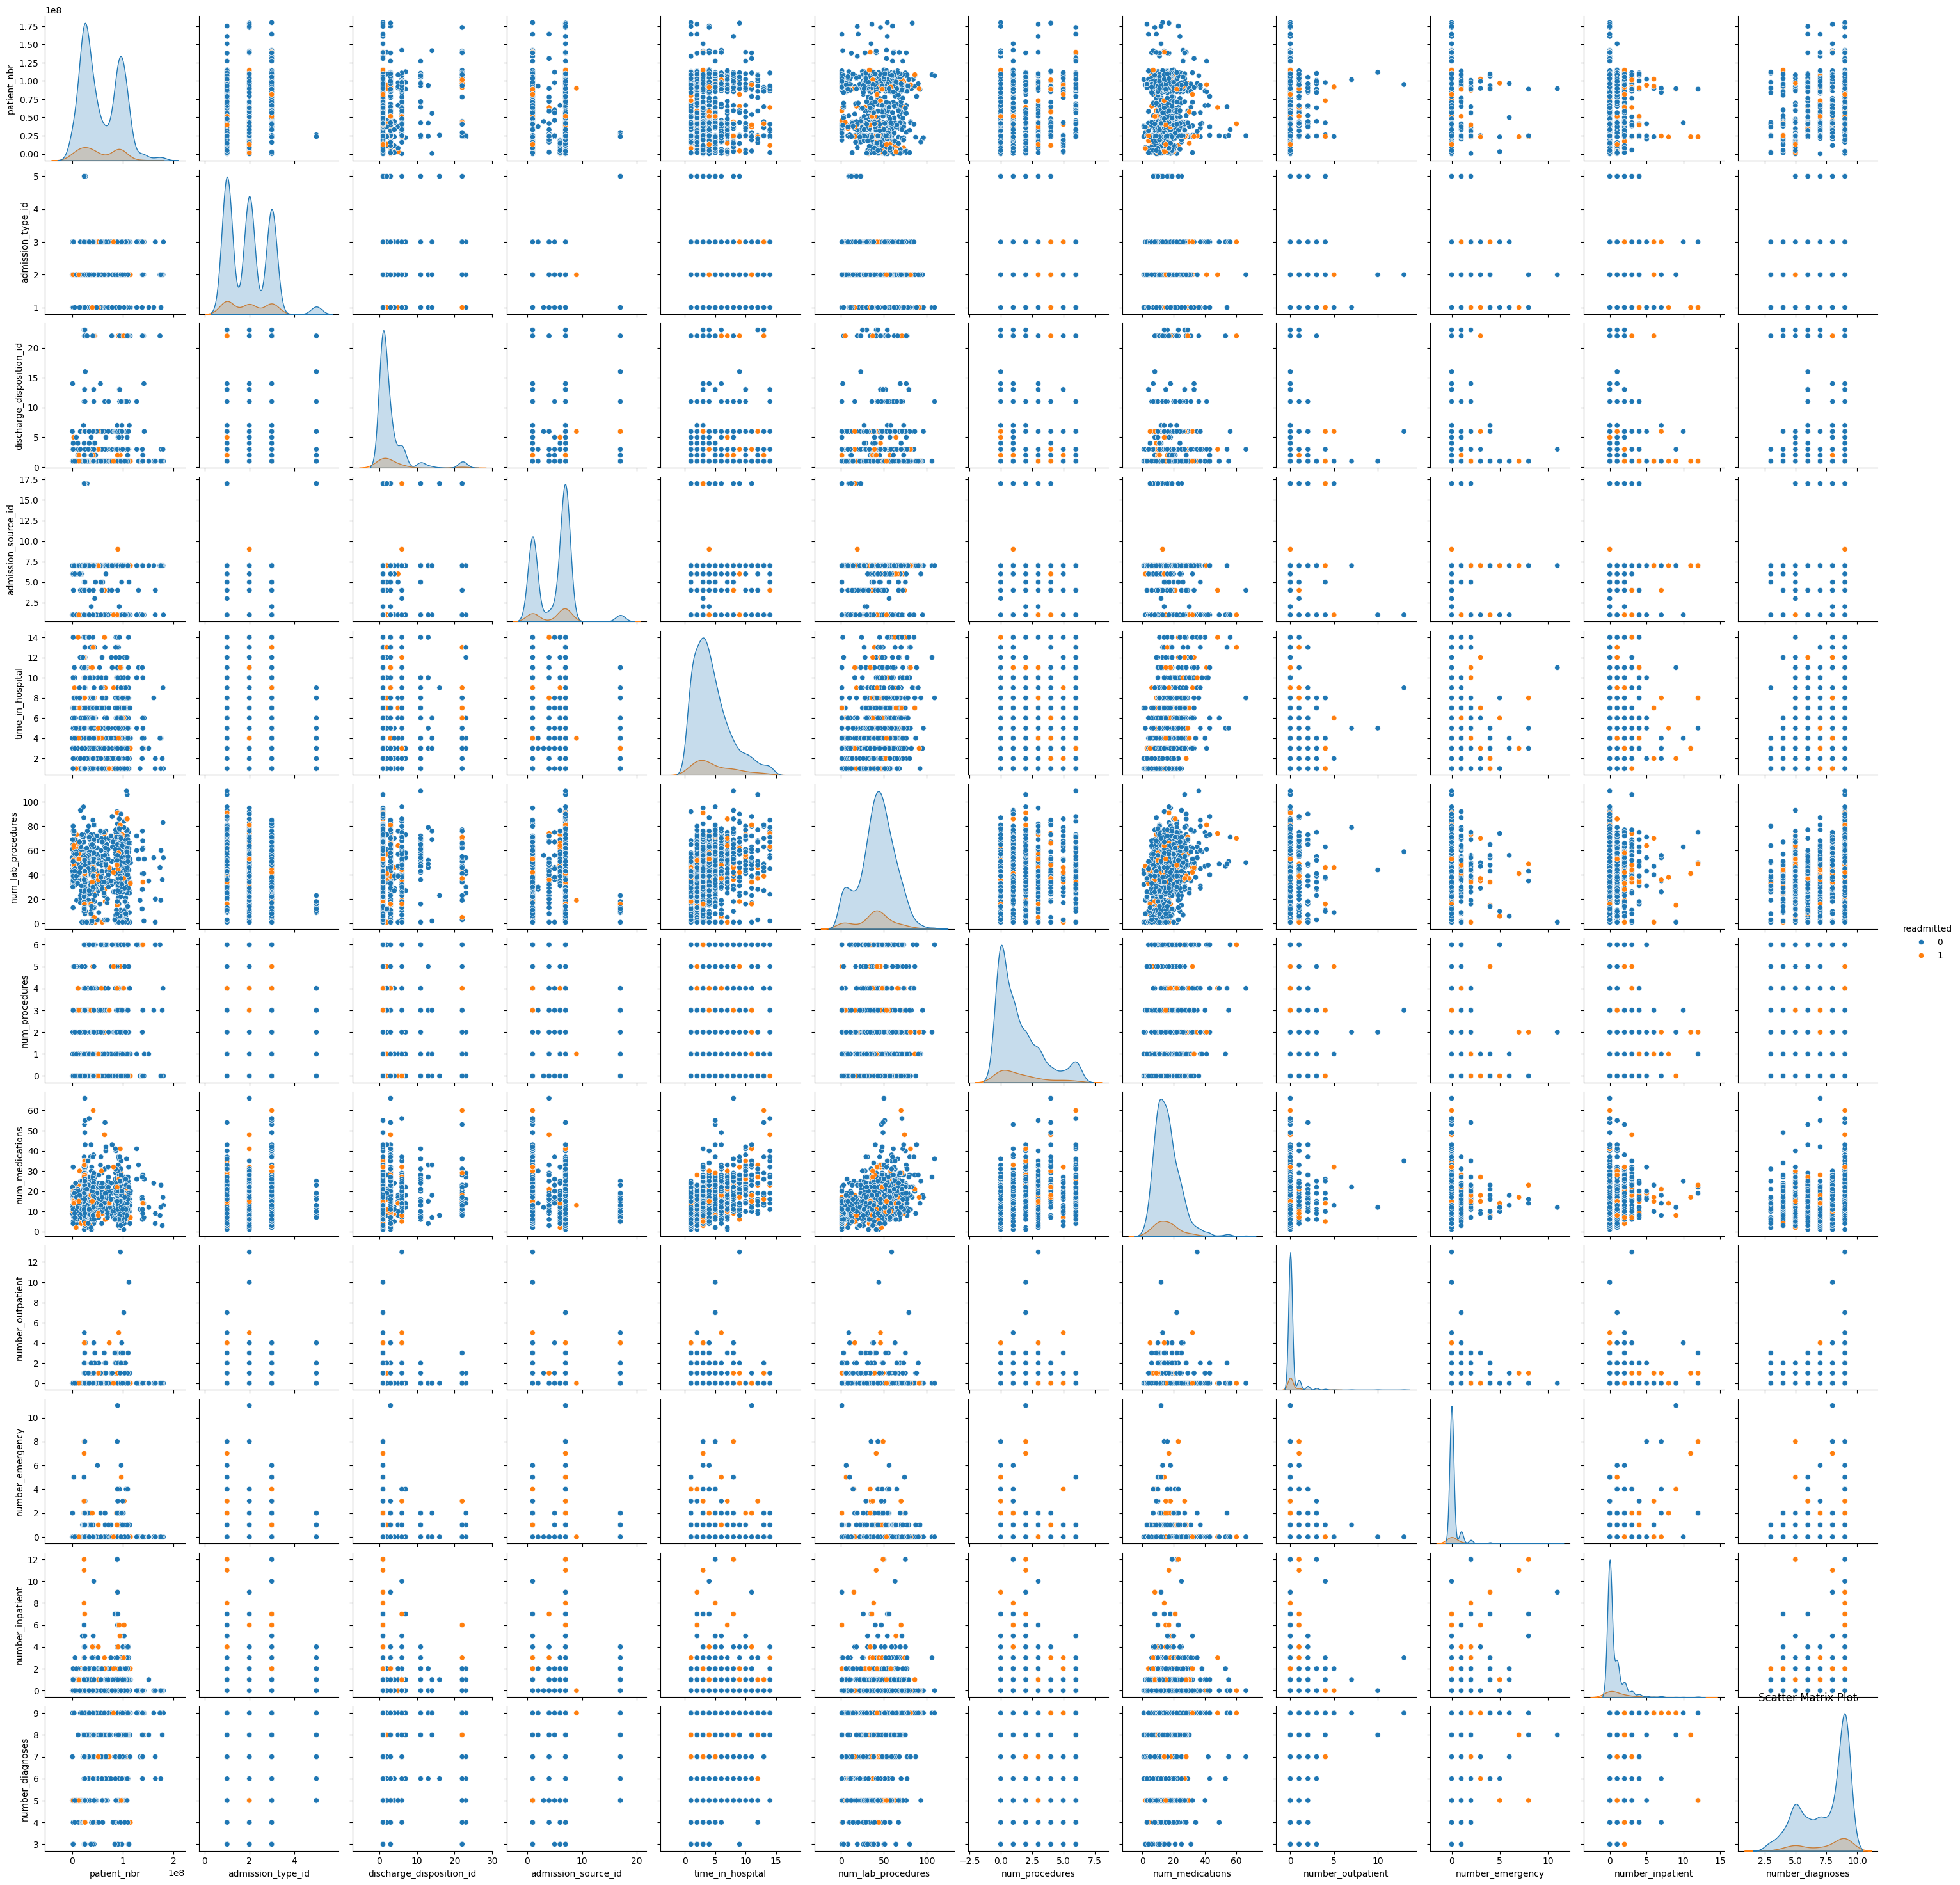

In [23]:
# Plotting the scatter matrix plot
sns.pairplot(diabetic_data.sample(n=1000), hue='readmitted')
plt.title('Scatter Matrix Plot')
plt.show()

<ipython-input-24-b31e12f37f04>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diabetic_data.corr()


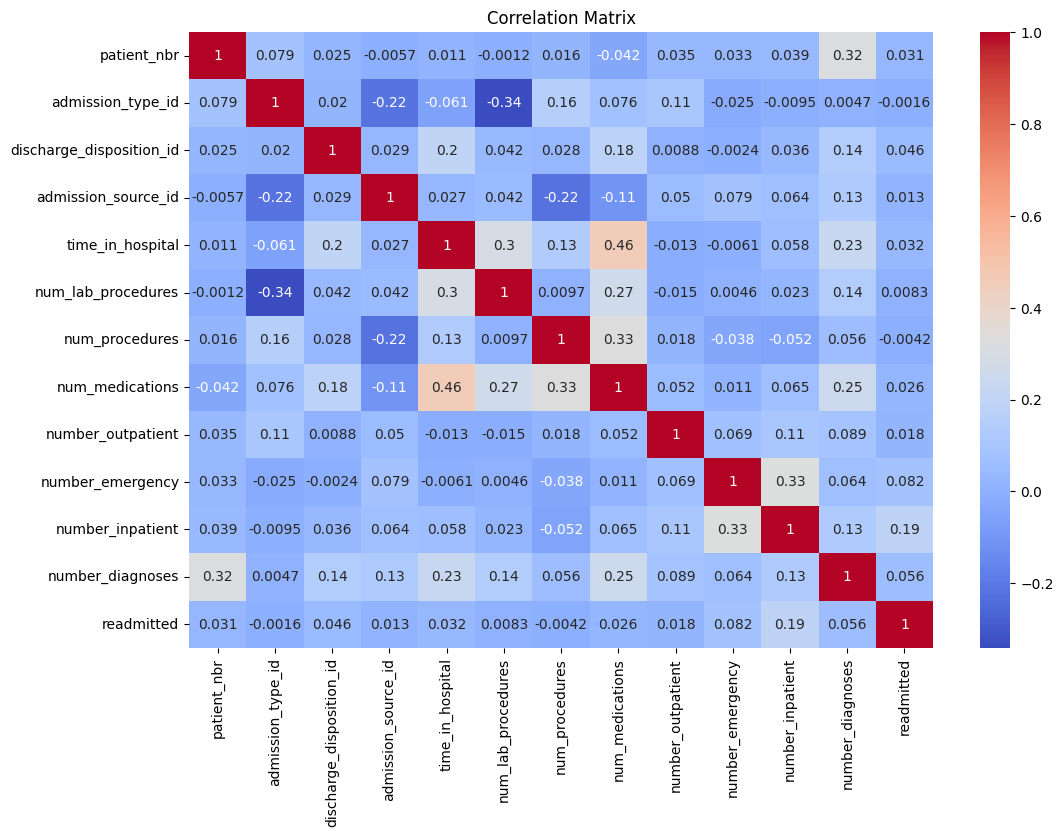

In [24]:
# Plotting the correlation matrix
correlation_matrix = diabetic_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

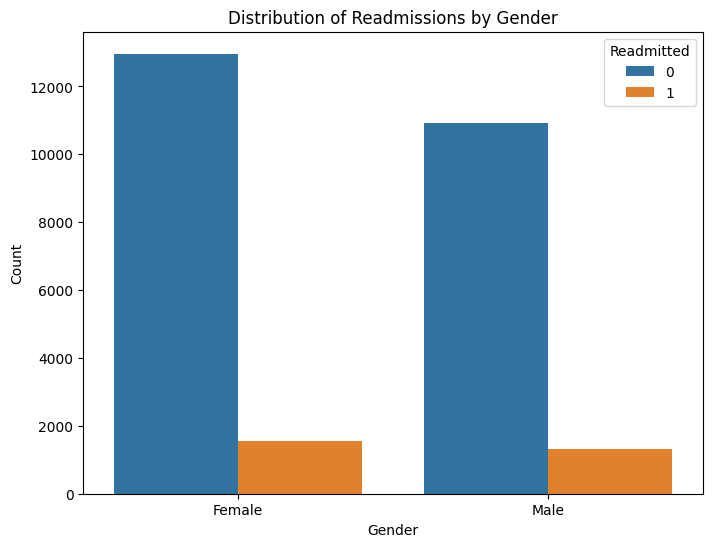

In [25]:
#Plotting distribution of Readmissions by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='readmitted', data=diabetic_data)
plt.title('Distribution of Readmissions by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
plt.show()

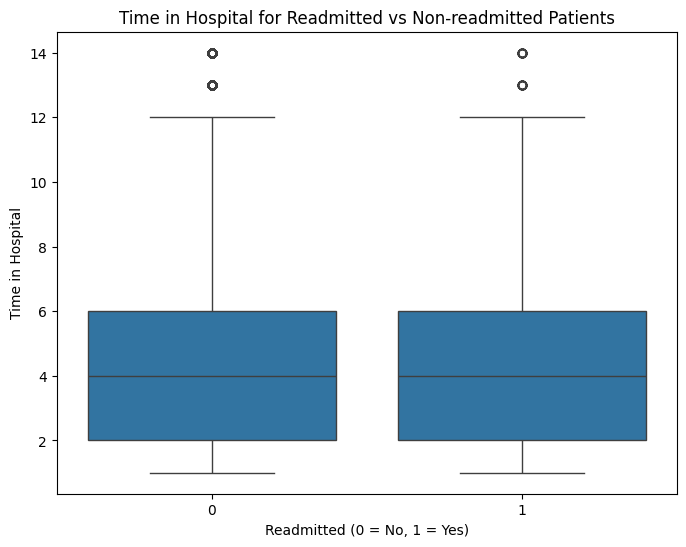

In [26]:
# Plotting Boxplot of Time in Hospital for Readmitted vs Non-readmitted Patients
plt.figure(figsize=(8, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=diabetic_data)
plt.title('Time in Hospital for Readmitted vs Non-readmitted Patients')
plt.xlabel('Readmitted (0 = No, 1 = Yes)')
plt.ylabel('Time in Hospital')
plt.show()

<ipython-input-27-6f75e90c264b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age', y='num_procedures', data=diabetic_data, ci=None)


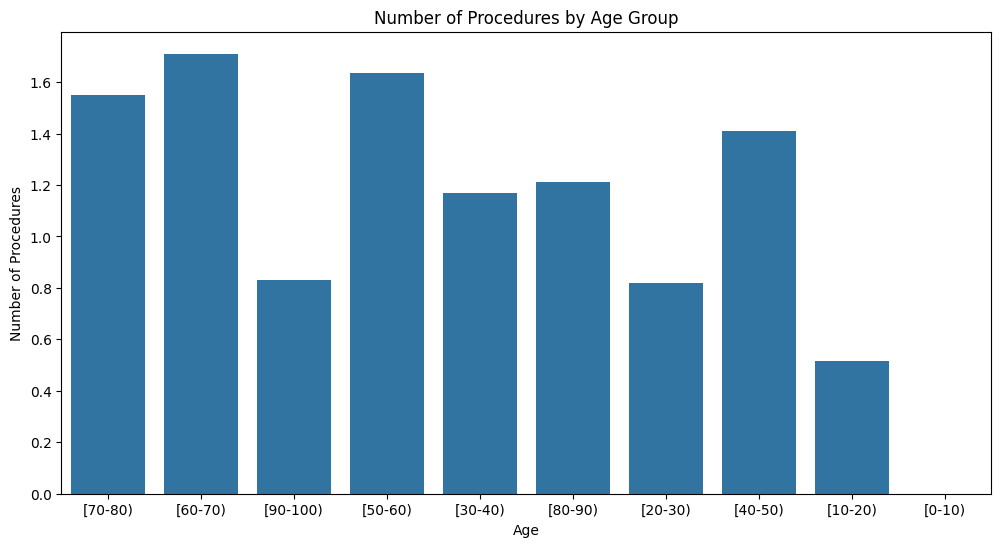

In [27]:
#Plotting Barplot of Number of Procedures by Age Group
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='num_procedures', data=diabetic_data, ci=None)
plt.title('Number of Procedures by Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Procedures')
plt.show()

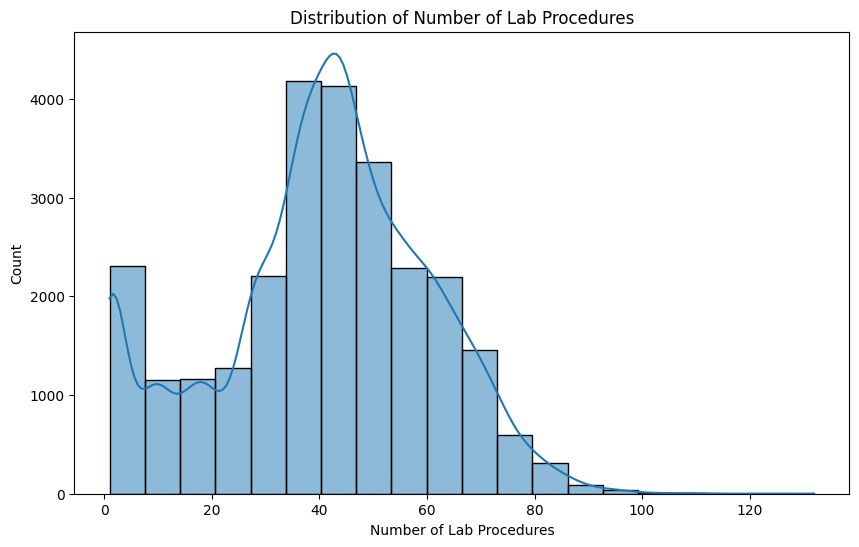

In [28]:
# Distribution of Number of Lab Procedures
plt.figure(figsize=(10, 6))
sns.histplot(x='num_lab_procedures', data=diabetic_data, bins=20, kde=True)
plt.title('Distribution of Number of Lab Procedures')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Count')
plt.show()

### **Model Building**

In [30]:
#loading required libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [31]:
# Selecting the predictors and target variable
predictors = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']
X = diabetic_data[predictors]
y = diabetic_data['readmitted']

In [33]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Converting age ranges to numerical values
age_mapping = {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
               '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}
X_train['age'] = X_train['age'].map(age_mapping)
X_test['age'] = X_test['age'].map(age_mapping)

In [36]:
# Building a first linear model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
# Evaluating the model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.89441719 0.8941836  0.8941836  0.8941836  0.89439252]
Mean Cross-Validation Score: 0.8942721042991527


In [38]:
# Predicting on test set
y_pred = model.predict(X_test)

In [39]:
# Evaluating the performance metrics
print("\nPerformance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Performance Metrics:
Accuracy: 0.8889927116426836
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[4757    0]
 [ 594    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4757
           1       0.00      0.00      0.00       594

    accuracy                           0.89      5351
   macro avg       0.44      0.50      0.47      5351
weighted avg       0.79      0.89      0.84      5351



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
# Balancing the data using undersampling
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [43]:
# Training the model again with balanced data
model_balanced = LogisticRegression(max_iter=1000)
model_balanced.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000)

In [44]:
# Predicting on test set with balanced data
y_pred_balanced = model_balanced.predict(X_test)

In [45]:
# Evaluating the performance metrics with balanced data
print("\nPerformance Metrics with Balanced Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Precision:", precision_score(y_test, y_pred_balanced))
print("Recall:", recall_score(y_test, y_pred_balanced))
print("F1 Score:", f1_score(y_test, y_pred_balanced))


Performance Metrics with Balanced Data:
Accuracy: 0.8889927116426836
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
# Confusion matrix with balanced data
print("\nConfusion Matrix with Balanced Data:")
print(confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report with Balanced Data:")
print(classification_report(y_test, y_pred_balanced))


Confusion Matrix with Balanced Data:
[[4757    0]
 [ 594    0]]

Classification Report with Balanced Data:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4757
           1       0.00      0.00      0.00       594

    accuracy                           0.89      5351
   macro avg       0.44      0.50      0.47      5351
weighted avg       0.79      0.89      0.84      5351



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Part 2: Improved model**

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/data/diabetic_data (1).csv")

In [50]:
# Handling missing values
df.replace('?', np.nan, inplace=True)

In [51]:
# Retaining near-zero variance columns
near_zero_variance_cols = ['examide', 'citoglipton', 'acetohexamide', 'tolbutamide', 'troglitazone',
                           'miglitol', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
                           'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
df.drop(columns=near_zero_variance_cols, inplace=True)

In [52]:
# Encoding categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [53]:
# Splitting the dataset into features and target variable
X = df.drop(columns=['readmitted'])
y = df['readmitted']

In [54]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Pipeline for preprocessing and modeling
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

In [63]:
# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

In [64]:
# Train the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedur...
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'insulin', 'change', 'diabetesMed'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [65]:
# Evaluating the model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5769381939667878
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.01      0.02      2285
           1       0.50      0.30      0.38      7117
           2       0.60      0.87      0.71     10952

    accuracy                           0.58     20354
   macro avg       0.51      0.40      0.37     20354
weighted avg       0.55      0.58      0.52     20354



In [66]:
# Using K-Means algorithm to cluster the cleansed dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [67]:
# Compare the obtained clusters with the distribution found in the data
df['cluster'] = kmeans.labels_
cluster_counts = df['cluster'].value_counts(normalize=True).sort_index()
print("Cluster distribution:")
print(cluster_counts)

Cluster distribution:
0    0.421211
1    0.201462
2    0.377326
Name: cluster, dtype: float64


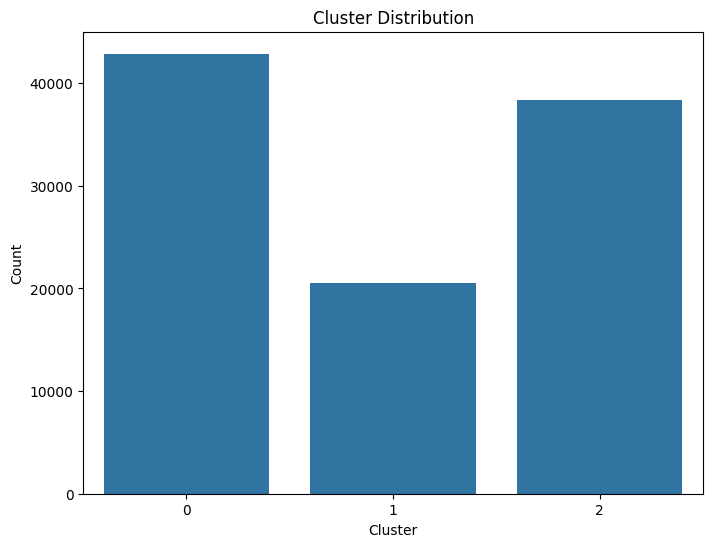

In [69]:
# Visualizing cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [70]:
# Building local classifiers based on the clustering
for cluster_label in range(3):
    cluster_data = df[df['cluster'] == cluster_label]
    X_cluster = cluster_data.drop(columns=['readmitted', 'cluster'])
    y_cluster = cluster_data['readmitted']

    X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(X_cluster, y_cluster,
                                                                                        test_size=0.2, random_state=42)

    # Train and evaluate local classifier
    local_clf = LogisticRegression(max_iter=1000)
    local_clf.fit(X_cluster_train, y_cluster_train)
    y_cluster_pred = local_clf.predict(X_cluster_test)
    print(f"Cluster {cluster_label} - Accuracy:", accuracy_score(y_cluster_test, y_cluster_pred))
    print(f"Cluster {cluster_label} - Classification Report:")
    print(classification_report(y_cluster_test, y_cluster_pred))

Cluster 0 - Accuracy: 0.4927096698938528
Cluster 0 - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       961
           1       0.47      0.28      0.35      3519
           2       0.50      0.79      0.61      4093

    accuracy                           0.49      8573
   macro avg       0.32      0.36      0.32      8573
weighted avg       0.43      0.49      0.44      8573



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cluster 1 - Accuracy: 0.5925384052670081
Cluster 1 - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       431
           1       0.00      0.00      0.00      1240
           2       0.59      1.00      0.74      2430

    accuracy                           0.59      4101
   macro avg       0.20      0.33      0.25      4101
weighted avg       0.35      0.59      0.44      4101



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cluster 2 - Accuracy: 0.57421875
Cluster 2 - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       828
           1       0.45      0.15      0.23      2477
           2       0.59      0.92      0.72      4375

    accuracy                           0.57      7680
   macro avg       0.35      0.36      0.32      7680
weighted avg       0.48      0.57      0.48      7680



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
